In [1]:
import scanpy as sc
import pandas as pd 
import numpy as np
import seaborn as sns

from scipy.stats import pearsonr

from sklearn.linear_model import ElasticNetCV, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, r2_score

import sys
import os
from importlib import reload

# Add the path of your package
package_path = os.path.abspath("/Genomics/pritykinlab/tamjeed/github_packages/GlossPath/")
sys.path.insert(0, package_path)

import matplotlib.pyplot as plt

import pickle

In [17]:
sorted_dict = [('Pathway 1', 100), ('Pathway 2', 93), ('Pathway 3', 75), ('Pathway 4', 32), ('Pathway 5', 15)]

Text(0.5, 0, 'Inclusion Frequency')

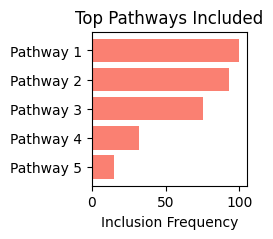

In [19]:
names, frequencies = zip(*sorted_dict)

# Create the bar plot
plt.figure(figsize=(2, 2))
plt.barh(list(reversed(names)), list(reversed(frequencies)), color='salmon')
plt.title('Top Pathways Included')
plt.xlabel('Inclusion Frequency')

Text(0.5, 0, 'Inclusion Frequency')

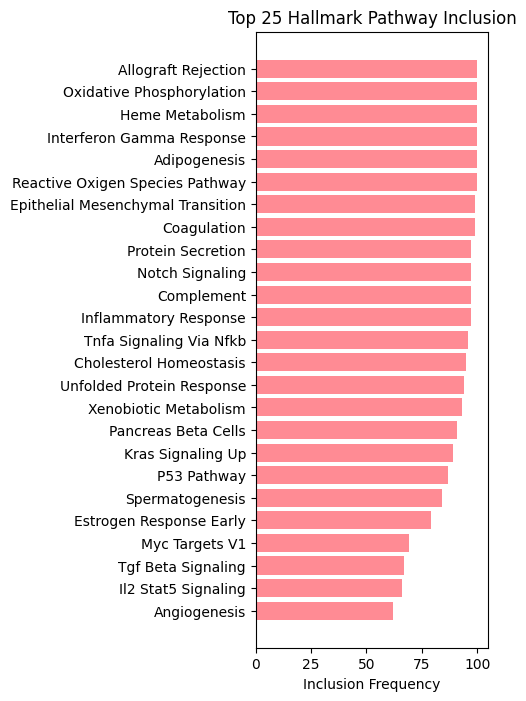

In [190]:
sorted_dict = hallmark_dict.pathway_frequencies['annotation_fine']['Mo/MF']

sub_sorted_dict = sorted_dict[:25]

pretty_sub_sorted_dict = [(s.split('_', 1)[1].title().replace('_', ' '), v) for s, v in sub_sorted_dict]

names, frequencies = zip(*pretty_sub_sorted_dict)

# Create the bar plot
plt.figure(figsize=(3, 8))
plt.barh(list(reversed(names)), list(reversed(frequencies)), color=method_colors['hallmark'])
plt.title('Top 25 Hallmark Pathway Inclusion')
plt.xlabel('Inclusion Frequency')

In [36]:
def top_coeff_plot(df, num_coefs, mystr):
    
    # Subset to first 15 and last 15 columns
    first_15_cols = df.iloc[:, :num_coefs]
    last_15_cols = df.iloc[:, -num_coefs:]

    # Melt the DataFrames separately
    first_15_melted = first_15_cols.melt(var_name='Feature', value_name='Coeff. Value')
    last_15_melted = last_15_cols.melt(var_name='Feature', value_name='Coeff. Value')

    # Add a group label
    first_15_melted['Group'] = 'Negative'
    last_15_melted['Group'] = 'Positive'

    # Combine the melted DataFrames
    df_melted = pd.concat([first_15_melted, last_15_melted]).iloc[::-1]

    # Create the boxplot
    plt.figure(figsize=(3, 2))
    plt.grid(True, which='both', axis='x', linestyle='--', color='gray')
    sns.boxplot(x='Coeff. Value', y='Feature', hue='Group', data=df_melted, palette=['#D9534F', '#5BC0DE'])

    # Rotate x labels for better readability
    # plt.xticks(rotation=90)
    
    # Show the plot
    #plt.title('{}'.format(mystr.split('_', 1)[1]))
    plt.title(mystr)
    plt.show()

In [21]:
with open('../model_lipstic_tumor/experiment_evaluations/tumor_glosspath_bootstrap_hallmark_oct9_2024.pickle', 'rb') as handle:
    hallmark_dict = pickle.load(handle)

In [22]:
df = hallmark_dict.response_individual_genes['annotation_fine']['Mo/MF'].drop(columns='log')

In [25]:
subset_df = df.iloc[:, list(range(3)) + list(range(-3, 0))]

In [27]:
labels = ['Gene 6', 'Gene 5', 'Gene 4', 'Gene 3', 'Gene 2', 'Gene 1']

In [28]:
subset_df.columns = labels

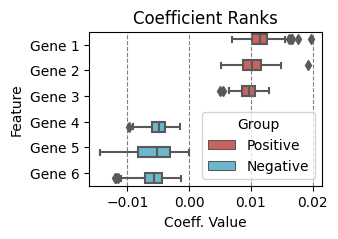

In [38]:
top_coeff_plot(subset_df, 3, 'Coefficient Ranks')

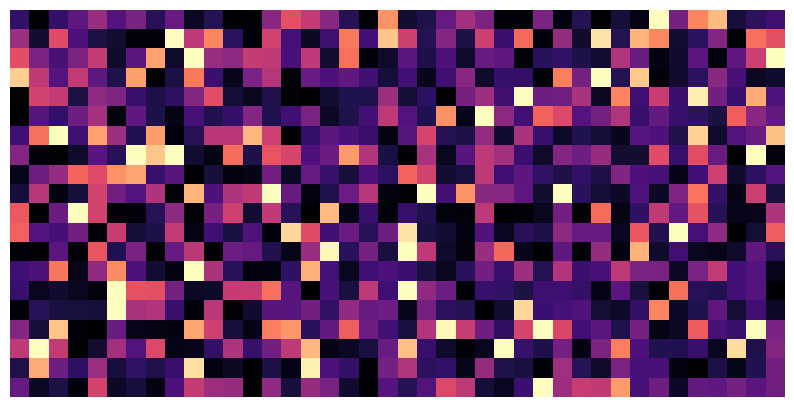

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a 50x50 matrix with values skewed towards zero using an exponential distribution
# Exponential distribution parameter scale controls how skewed the data is (smaller scale = more sparse)
matrix_data = np.random.exponential(scale=0.3, size=(20, 40))

# Clip the values to 1 to limit extremely large values
matrix_data = np.clip(matrix_data, 0, 1)

# Create a heatmap with no annotations and no labels
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_data, cmap='magma', cbar=False, square=True, xticklabels=False, yticklabels=False)

# Save the matrix as an image
plt.savefig('matrix_visualization_sparse_exponential.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()



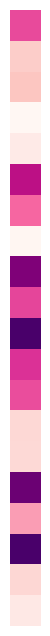

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a 50x50 matrix with values skewed towards zero using an exponential distribution
# Exponential distribution parameter scale controls how skewed the data is (smaller scale = more sparse)
matrix_data = np.random.exponential(scale=0.7, size=(20, 1))

# Clip the values to 1 to limit extremely large values
matrix_data = np.clip(matrix_data, 0, 1)

# Create a heatmap with no annotations and no labels
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_data, cmap='RdPu', cbar=False, square=True, xticklabels=False, yticklabels=False)

# Save the matrix as an image
plt.savefig('matrix_visualization_sparse_exponential.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()